In [2]:
# Naive Bayes
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Task 1 : Importing the dataset


dataset = data = pd.read_csv("winequalityN.csv")
data.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
# Task 2 : print the names of the first 13 feature
print(dataset.head(13))


     type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0   white            7.0              0.27         0.36           20.70   
1   white            6.3              0.30         0.34            1.60   
2   white            8.1              0.28         0.40            6.90   
3   white            7.2              0.23         0.32            8.50   
4   white            7.2              0.23         0.32            8.50   
5   white            8.1              0.28         0.40            6.90   
6   white            6.2              0.32         0.16            7.00   
7   white            7.0              0.27         0.36           20.70   
8   white            6.3              0.30         0.34            1.60   
9   white            8.1              0.22         0.43            1.50   
10  white            8.1              0.27         0.41            1.45   
11  white            8.6              0.23         0.40            4.20   
12  white            7.9 

In [5]:
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values
print(X)
print()
print(y)

[[0.27  0.36 ]
 [0.3   0.34 ]
 [0.28  0.4  ]
 ...
 [0.51  0.13 ]
 [0.645 0.12 ]
 [0.31  0.47 ]]

[20.7  1.6  6.9 ...  2.3  2.   3.6]


In [10]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split


# Task 3:  train the model
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 0)

In [8]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [19]:
# Task 4: Fitting Naive Bayes to the Training set
dataset.dropna()
from sklearn.naive_bayes import GaussianNB  
classifier = GaussianNB()  
classifier.fit(X_train, y_train)


ValueError: Input y contains NaN.

In [12]:
# Task 5: Predicting the Test set results

y_pred = classifier.predict(X_test)
print(y_pred)

NotFittedError: This GaussianNB instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [15]:
# Task 6 : Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
"""
# Task 6 : Making the Confusion Matrix
from sklearn.metrics import confusion_matrix,class
cm = confusion_matrix(y_test, y_pred)
print(cm)
"""

NameError: name 'y_pred' is not defined

In [16]:
# Task 7 : Making the Classification report

from sklearn.metrics import classification_report
cm1 = classification_report(y_test, y_pred)
print(cm1)



NameError: name 'y_pred' is not defined

In [17]:
# Task 8 : Making the Classification accuracy score
from sklearn.metrics import accuracy_score
cm2 = accuracy_score(y_test, y_pred)
print(cm2)


NameError: name 'y_pred' is not defined

In [18]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Naive Bayes (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

ValueError: arange: cannot compute length

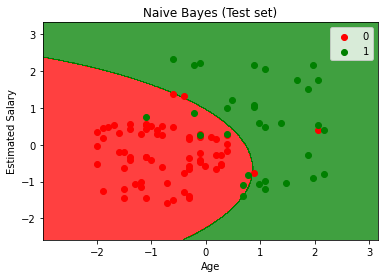

In [ ]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Naive Bayes (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()